In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import optimizers
from input_preparation import ImageDataGenerator
from keras.models import Model, load_model
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

from feature_preprocess import feature_vector
from input_preparation import *

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils.vis_utils import plot_model
import matplotlib.pyplot as plt
import numpy as np

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
model = Sequential()
model.add(Dense(2048, input_shape=(2014,)))
model.add(Activation('relu'))
model.add(Dropout(0.6))
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.6))
model.add(Dense(18, activation='softmax'))

In [3]:
# compile the model
model.compile(loss="categorical_crossentropy", optimizer=optimizers.SGD(lr=1e-4, momentum=0.9), metrics=["accuracy"])

In [4]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 2048)              4126720   
_________________________________________________________________
activation_1 (Activation)    (None, 2048)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
activation_2 (Activation)    (None, 1024)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 18)                18450     
Total para

In [5]:
nb_train_samples = 32488
nb_validation_samples = 5723
batch_size = 32
epochs = 1000

In [6]:
from resnets_utils import*

# initiate the train and validation generators with data augumentation
X_train, Y_train_orig, X_test, Y_test_orig = load_dataset()

# Convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(Y_train_orig, 18)
Y_test = convert_to_one_hot(Y_test_orig, 18)

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

# save the model according to the conditions
checkpoint = ModelCheckpoint("models/feature_network.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')

number of training examples = 32488
number of test examples = 5723
X_train shape: (32488, 2014)
Y_train shape: (32488, 18)
X_test shape: (5723, 2014)
Y_test shape: (5723, 18)


In [7]:
H = model.fit(X_train, Y_train, 
          epochs=epochs, batch_size=batch_size, 
          callbacks = [checkpoint], 
          validation_data=(X_test, Y_test))

Train on 32488 samples, validate on 5723 samples
Epoch 1/1000
32488/32488 [==============================] - 21s 638us/step - loss: 2.8762 - acc: 0.0728 - val_loss: 2.8493 - val_acc: 0.0956

Epoch 00001: val_acc improved from -inf to 0.09558, saving model to models/feature_network.h5
Epoch 2/1000
32488/32488 [==============================] - 20s 618us/step - loss: 2.8481 - acc: 0.0841 - val_loss: 2.8335 - val_acc: 0.0940

Epoch 00002: val_acc did not improve
Epoch 3/1000
32488/32488 [==============================] - 20s 615us/step - loss: 2.8391 - acc: 0.0867 - val_loss: 2.8268 - val_acc: 0.0949

Epoch 00003: val_acc did not improve
Epoch 4/1000
32488/32488 [==============================] - 20s 614us/step - loss: 2.8346 - acc: 0.0891 - val_loss: 2.8231 - val_acc: 0.0954

Epoch 00004: val_acc did not improve
Epoch 5/1000
32488/32488 [==============================] - 20s 615us/step - loss: 2.8319 - acc: 0.0899 - val_loss: 2.8204 - val_acc: 0.0992

Epoch 00005: val_acc improved from 0


Epoch 00072: val_acc improved from 0.20933 to 0.21248, saving model to models/feature_network.h5
Epoch 73/1000
32488/32488 [==============================] - 20s 615us/step - loss: 2.5227 - acc: 0.2000 - val_loss: 2.4708 - val_acc: 0.2121

Epoch 00073: val_acc did not improve
Epoch 74/1000
32488/32488 [==============================] - 20s 614us/step - loss: 2.5162 - acc: 0.2022 - val_loss: 2.4631 - val_acc: 0.2137

Epoch 00074: val_acc improved from 0.21248 to 0.21370, saving model to models/feature_network.h5
Epoch 75/1000
32488/32488 [==============================] - 20s 614us/step - loss: 2.5099 - acc: 0.2024 - val_loss: 2.4560 - val_acc: 0.2200

Epoch 00075: val_acc improved from 0.21370 to 0.21999, saving model to models/feature_network.h5
Epoch 76/1000
32488/32488 [==============================] - 20s 615us/step - loss: 2.5004 - acc: 0.2050 - val_loss: 2.4475 - val_acc: 0.2160

Epoch 00076: val_acc did not improve
Epoch 77/1000
32488/32488 [==============================] - 2

32488/32488 [==============================] - 20s 614us/step - loss: 2.3248 - acc: 0.2444 - val_loss: 2.2774 - val_acc: 0.2551

Epoch 00109: val_acc did not improve
Epoch 110/1000
32488/32488 [==============================] - 20s 615us/step - loss: 2.3237 - acc: 0.2444 - val_loss: 2.2740 - val_acc: 0.2579

Epoch 00110: val_acc improved from 0.25651 to 0.25791, saving model to models/feature_network.h5
Epoch 111/1000
32488/32488 [==============================] - 20s 615us/step - loss: 2.3177 - acc: 0.2467 - val_loss: 2.2708 - val_acc: 0.2588

Epoch 00111: val_acc improved from 0.25791 to 0.25878, saving model to models/feature_network.h5
Epoch 112/1000
32488/32488 [==============================] - 20s 615us/step - loss: 2.3149 - acc: 0.2473 - val_loss: 2.2673 - val_acc: 0.2593

Epoch 00112: val_acc improved from 0.25878 to 0.25930, saving model to models/feature_network.h5
Epoch 113/1000
32488/32488 [==============================] - 20s 615us/step - loss: 2.3109 - acc: 0.2500 - val

32488/32488 [==============================] - 20s 615us/step - loss: 2.1044 - acc: 0.3140 - val_loss: 2.0688 - val_acc: 0.3247

Epoch 00184: val_acc did not improve
Epoch 185/1000
32488/32488 [==============================] - 20s 615us/step - loss: 2.1025 - acc: 0.3125 - val_loss: 2.0699 - val_acc: 0.3240

Epoch 00185: val_acc did not improve
Epoch 186/1000
32488/32488 [==============================] - 20s 615us/step - loss: 2.0987 - acc: 0.3168 - val_loss: 2.0643 - val_acc: 0.3259

Epoch 00186: val_acc improved from 0.32483 to 0.32588, saving model to models/feature_network.h5
Epoch 187/1000
32488/32488 [==============================] - 20s 615us/step - loss: 2.0934 - acc: 0.3139 - val_loss: 2.0625 - val_acc: 0.3271

Epoch 00187: val_acc improved from 0.32588 to 0.32710, saving model to models/feature_network.h5
Epoch 188/1000
32488/32488 [==============================] - 20s 613us/step - loss: 2.0926 - acc: 0.3157 - val_loss: 2.0599 - val_acc: 0.3268

Epoch 00188: val_acc did no

32488/32488 [==============================] - 20s 615us/step - loss: 2.0141 - acc: 0.3453 - val_loss: 1.9866 - val_acc: 0.3577

Epoch 00223: val_acc improved from 0.35716 to 0.35768, saving model to models/feature_network.h5
Epoch 224/1000
32488/32488 [==============================] - 20s 612us/step - loss: 2.0087 - acc: 0.3432 - val_loss: 1.9848 - val_acc: 0.3572

Epoch 00224: val_acc did not improve
Epoch 225/1000
32488/32488 [==============================] - 20s 614us/step - loss: 2.0096 - acc: 0.3443 - val_loss: 1.9816 - val_acc: 0.3584

Epoch 00225: val_acc improved from 0.35768 to 0.35838, saving model to models/feature_network.h5
Epoch 226/1000
32488/32488 [==============================] - 20s 614us/step - loss: 2.0047 - acc: 0.3461 - val_loss: 1.9814 - val_acc: 0.3563

Epoch 00226: val_acc did not improve
Epoch 227/1000
32488/32488 [==============================] - 20s 615us/step - loss: 2.0000 - acc: 0.3452 - val_loss: 1.9783 - val_acc: 0.3586

Epoch 00227: val_acc improv

32488/32488 [==============================] - 20s 614us/step - loss: 1.9252 - acc: 0.3685 - val_loss: 1.9153 - val_acc: 0.3762

Epoch 00263: val_acc improved from 0.37498 to 0.37620, saving model to models/feature_network.h5
Epoch 264/1000
32488/32488 [==============================] - 20s 614us/step - loss: 1.9223 - acc: 0.3712 - val_loss: 1.9143 - val_acc: 0.3755

Epoch 00264: val_acc did not improve
Epoch 265/1000
32488/32488 [==============================] - 20s 613us/step - loss: 1.9238 - acc: 0.3697 - val_loss: 1.9121 - val_acc: 0.3720

Epoch 00265: val_acc did not improve
Epoch 266/1000
32488/32488 [==============================] - 20s 614us/step - loss: 1.9170 - acc: 0.3718 - val_loss: 1.9111 - val_acc: 0.3772

Epoch 00266: val_acc improved from 0.37620 to 0.37725, saving model to models/feature_network.h5
Epoch 267/1000
32488/32488 [==============================] - 20s 615us/step - loss: 1.9236 - acc: 0.3720 - val_loss: 1.9112 - val_acc: 0.3767

Epoch 00267: val_acc did no

32488/32488 [==============================] - 20s 615us/step - loss: 1.8492 - acc: 0.3904 - val_loss: 1.8604 - val_acc: 0.3900

Epoch 00304: val_acc did not improve
Epoch 305/1000
32488/32488 [==============================] - 20s 615us/step - loss: 1.8460 - acc: 0.3953 - val_loss: 1.8581 - val_acc: 0.3951

Epoch 00305: val_acc improved from 0.39263 to 0.39507, saving model to models/feature_network.h5
Epoch 306/1000
32488/32488 [==============================] - 20s 614us/step - loss: 1.8457 - acc: 0.3964 - val_loss: 1.8578 - val_acc: 0.3925

Epoch 00306: val_acc did not improve
Epoch 307/1000
32488/32488 [==============================] - 20s 614us/step - loss: 1.8439 - acc: 0.3950 - val_loss: 1.8550 - val_acc: 0.3942

Epoch 00307: val_acc did not improve
Epoch 308/1000
32488/32488 [==============================] - 20s 614us/step - loss: 1.8401 - acc: 0.3973 - val_loss: 1.8551 - val_acc: 0.3925

Epoch 00308: val_acc did not improve
Epoch 309/1000
32488/32488 [======================

32488/32488 [==============================] - 20s 614us/step - loss: 1.7807 - acc: 0.4154 - val_loss: 1.8150 - val_acc: 0.4042

Epoch 00346: val_acc did not improve
Epoch 347/1000
32488/32488 [==============================] - 20s 615us/step - loss: 1.7763 - acc: 0.4212 - val_loss: 1.8142 - val_acc: 0.4024

Epoch 00347: val_acc did not improve
Epoch 348/1000
32488/32488 [==============================] - 20s 614us/step - loss: 1.7792 - acc: 0.4173 - val_loss: 1.8133 - val_acc: 0.4057

Epoch 00348: val_acc improved from 0.40538 to 0.40573, saving model to models/feature_network.h5
Epoch 349/1000
32488/32488 [==============================] - 20s 616us/step - loss: 1.7782 - acc: 0.4188 - val_loss: 1.8130 - val_acc: 0.4050

Epoch 00349: val_acc did not improve
Epoch 350/1000
32488/32488 [==============================] - 20s 614us/step - loss: 1.7763 - acc: 0.4182 - val_loss: 1.8120 - val_acc: 0.4033

Epoch 00350: val_acc did not improve
Epoch 351/1000
32488/32488 [======================

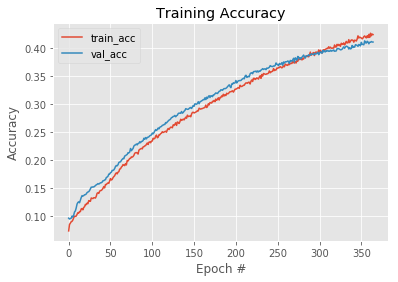

In [9]:
plt.style.use("ggplot")
plt.figure()
N = 365
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="upper left")
plt.savefig('feature_network.png')
plt.show()

In [10]:
H = model.fit(X_train, Y_train, 
          epochs=epochs, batch_size=batch_size, 
          callbacks = [checkpoint],
          initial_epoch = 365,
          validation_data=(X_test, Y_test))

Train on 32488 samples, validate on 5723 samples
Epoch 366/1000
32488/32488 [==============================] - 20s 615us/step - loss: 1.7494 - acc: 0.4253 - val_loss: 1.7998 - val_acc: 0.4094

Epoch 00366: val_acc did not improve
Epoch 367/1000
32488/32488 [==============================] - 20s 619us/step - loss: 1.7478 - acc: 0.4255 - val_loss: 1.7968 - val_acc: 0.4129

Epoch 00367: val_acc improved from 0.41220 to 0.41290, saving model to models/feature_network.h5
Epoch 368/1000
32488/32488 [==============================] - 20s 616us/step - loss: 1.7468 - acc: 0.4213 - val_loss: 1.7981 - val_acc: 0.4143

Epoch 00368: val_acc improved from 0.41290 to 0.41429, saving model to models/feature_network.h5
Epoch 369/1000
32488/32488 [==============================] - 20s 614us/step - loss: 1.7491 - acc: 0.4256 - val_loss: 1.7964 - val_acc: 0.4120

Epoch 00369: val_acc did not improve
Epoch 370/1000
32488/32488 [==============================] - 20s 615us/step - loss: 1.7500 - acc: 0.4264 -

32488/32488 [==============================] - 20s 613us/step - loss: 1.6439 - acc: 0.4587 - val_loss: 1.7409 - val_acc: 0.4277

Epoch 00448: val_acc did not improve
Epoch 449/1000
32488/32488 [==============================] - 20s 612us/step - loss: 1.6393 - acc: 0.4592 - val_loss: 1.7403 - val_acc: 0.4300

Epoch 00449: val_acc did not improve
Epoch 450/1000
32488/32488 [==============================] - 20s 613us/step - loss: 1.6376 - acc: 0.4573 - val_loss: 1.7391 - val_acc: 0.4314

Epoch 00450: val_acc improved from 0.43089 to 0.43142, saving model to models/feature_network.h5
Epoch 451/1000
32488/32488 [==============================] - 20s 612us/step - loss: 1.6398 - acc: 0.4582 - val_loss: 1.7384 - val_acc: 0.4311

Epoch 00451: val_acc did not improve
Epoch 452/1000
32488/32488 [==============================] - 20s 611us/step - loss: 1.6409 - acc: 0.4590 - val_loss: 1.7406 - val_acc: 0.4293

Epoch 00452: val_acc did not improve
Epoch 453/1000
32488/32488 [======================


Epoch 00490: val_acc did not improve
Epoch 491/1000
32488/32488 [==============================] - 20s 615us/step - loss: 1.5927 - acc: 0.4748 - val_loss: 1.7177 - val_acc: 0.4379

Epoch 00491: val_acc did not improve
Epoch 492/1000
32488/32488 [==============================] - 20s 611us/step - loss: 1.5853 - acc: 0.4717 - val_loss: 1.7189 - val_acc: 0.4351

Epoch 00492: val_acc did not improve
Epoch 493/1000
32488/32488 [==============================] - 20s 616us/step - loss: 1.5883 - acc: 0.4767 - val_loss: 1.7154 - val_acc: 0.4367

Epoch 00493: val_acc did not improve
Epoch 494/1000
32488/32488 [==============================] - 20s 616us/step - loss: 1.5815 - acc: 0.4767 - val_loss: 1.7147 - val_acc: 0.4388

Epoch 00494: val_acc improved from 0.43788 to 0.43876, saving model to models/feature_network.h5
Epoch 495/1000
32488/32488 [==============================] - 20s 613us/step - loss: 1.5799 - acc: 0.4772 - val_loss: 1.7180 - val_acc: 0.4346

Epoch 00495: val_acc did not impro


Epoch 00576: val_acc did not improve
Epoch 577/1000
32488/32488 [==============================] - 20s 619us/step - loss: 1.4828 - acc: 0.5042 - val_loss: 1.6806 - val_acc: 0.4466

Epoch 00577: val_acc did not improve
Epoch 578/1000
32488/32488 [==============================] - 20s 618us/step - loss: 1.4782 - acc: 0.5089 - val_loss: 1.6778 - val_acc: 0.4475

Epoch 00578: val_acc did not improve
Epoch 579/1000
32488/32488 [==============================] - 20s 618us/step - loss: 1.4800 - acc: 0.5089 - val_loss: 1.6781 - val_acc: 0.4485

Epoch 00579: val_acc did not improve
Epoch 580/1000
32488/32488 [==============================] - 20s 618us/step - loss: 1.4768 - acc: 0.5119 - val_loss: 1.6767 - val_acc: 0.4485

Epoch 00580: val_acc did not improve
Epoch 581/1000
32488/32488 [==============================] - 20s 621us/step - loss: 1.4742 - acc: 0.5110 - val_loss: 1.6784 - val_acc: 0.4478

Epoch 00581: val_acc did not improve
Epoch 582/1000
32488/32488 [=============================

32488/32488 [==============================] - 20s 616us/step - loss: 1.4240 - acc: 0.5263 - val_loss: 1.6646 - val_acc: 0.4538

Epoch 00621: val_acc did not improve
Epoch 622/1000
32488/32488 [==============================] - 20s 622us/step - loss: 1.4265 - acc: 0.5250 - val_loss: 1.6643 - val_acc: 0.4503

Epoch 00622: val_acc did not improve
Epoch 623/1000
32488/32488 [==============================] - 20s 626us/step - loss: 1.4226 - acc: 0.5282 - val_loss: 1.6626 - val_acc: 0.4534

Epoch 00623: val_acc did not improve
Epoch 624/1000
32488/32488 [==============================] - 20s 626us/step - loss: 1.4244 - acc: 0.5254 - val_loss: 1.6621 - val_acc: 0.4534

Epoch 00624: val_acc did not improve
Epoch 625/1000
32488/32488 [==============================] - 20s 619us/step - loss: 1.4259 - acc: 0.5247 - val_loss: 1.6624 - val_acc: 0.4520

Epoch 00625: val_acc did not improve
Epoch 626/1000
32488/32488 [==============================] - 20s 617us/step - loss: 1.4244 - acc: 0.5253 - va


Epoch 00664: val_acc improved from 0.46095 to 0.46112, saving model to models/feature_network.h5
Epoch 665/1000
32488/32488 [==============================] - 20s 620us/step - loss: 1.3749 - acc: 0.5427 - val_loss: 1.6507 - val_acc: 0.4592

Epoch 00665: val_acc did not improve
Epoch 666/1000
32488/32488 [==============================] - 20s 620us/step - loss: 1.3715 - acc: 0.5404 - val_loss: 1.6550 - val_acc: 0.4578

Epoch 00666: val_acc did not improve
Epoch 667/1000
32488/32488 [==============================] - 20s 617us/step - loss: 1.3702 - acc: 0.5413 - val_loss: 1.6500 - val_acc: 0.4616

Epoch 00667: val_acc improved from 0.46112 to 0.46165, saving model to models/feature_network.h5
Epoch 668/1000
32488/32488 [==============================] - 20s 623us/step - loss: 1.3701 - acc: 0.5442 - val_loss: 1.6498 - val_acc: 0.4608

Epoch 00668: val_acc did not improve
Epoch 669/1000
32488/32488 [==============================] - 20s 620us/step - loss: 1.3693 - acc: 0.5448 - val_loss: 

32488/32488 [==============================] - 20s 618us/step - loss: 1.2755 - acc: 0.5742 - val_loss: 1.6313 - val_acc: 0.4693

Epoch 00751: val_acc did not improve
Epoch 752/1000
32488/32488 [==============================] - 20s 616us/step - loss: 1.2769 - acc: 0.5729 - val_loss: 1.6354 - val_acc: 0.4650

Epoch 00752: val_acc did not improve
Epoch 753/1000
32488/32488 [==============================] - 20s 619us/step - loss: 1.2767 - acc: 0.5739 - val_loss: 1.6346 - val_acc: 0.4650

Epoch 00753: val_acc did not improve
Epoch 754/1000
32488/32488 [==============================] - 20s 616us/step - loss: 1.2738 - acc: 0.5751 - val_loss: 1.6286 - val_acc: 0.4674

Epoch 00754: val_acc did not improve
Epoch 755/1000
32488/32488 [==============================] - 20s 617us/step - loss: 1.2746 - acc: 0.5755 - val_loss: 1.6299 - val_acc: 0.4681

Epoch 00755: val_acc did not improve
Epoch 756/1000
32488/32488 [==============================] - 20s 618us/step - loss: 1.2702 - acc: 0.5734 - va

32488/32488 [==============================] - 20s 623us/step - loss: 1.2305 - acc: 0.5881 - val_loss: 1.6226 - val_acc: 0.4678

Epoch 00796: val_acc did not improve
Epoch 797/1000
32488/32488 [==============================] - 20s 621us/step - loss: 1.2193 - acc: 0.5944 - val_loss: 1.6288 - val_acc: 0.4672

Epoch 00797: val_acc did not improve
Epoch 798/1000
32488/32488 [==============================] - 20s 619us/step - loss: 1.2204 - acc: 0.5923 - val_loss: 1.6251 - val_acc: 0.4692

Epoch 00798: val_acc did not improve
Epoch 799/1000
32488/32488 [==============================] - 20s 619us/step - loss: 1.2186 - acc: 0.5934 - val_loss: 1.6256 - val_acc: 0.4653

Epoch 00799: val_acc did not improve
Epoch 800/1000
32488/32488 [==============================] - 20s 617us/step - loss: 1.2219 - acc: 0.5882 - val_loss: 1.6253 - val_acc: 0.4725

Epoch 00800: val_acc did not improve
Epoch 801/1000
32488/32488 [==============================] - 20s 618us/step - loss: 1.2200 - acc: 0.5923 - va


Epoch 00840: val_acc did not improve
Epoch 841/1000
32488/32488 [==============================] - 20s 618us/step - loss: 1.1701 - acc: 0.6077 - val_loss: 1.6209 - val_acc: 0.4678

Epoch 00841: val_acc did not improve
Epoch 842/1000
32488/32488 [==============================] - 20s 619us/step - loss: 1.1735 - acc: 0.6053 - val_loss: 1.6196 - val_acc: 0.4699

Epoch 00842: val_acc did not improve
Epoch 843/1000
32488/32488 [==============================] - 20s 621us/step - loss: 1.1713 - acc: 0.6065 - val_loss: 1.6223 - val_acc: 0.4688

Epoch 00843: val_acc did not improve
Epoch 844/1000
32488/32488 [==============================] - 20s 622us/step - loss: 1.1659 - acc: 0.6086 - val_loss: 1.6179 - val_acc: 0.4739

Epoch 00844: val_acc improved from 0.47335 to 0.47388, saving model to models/feature_network.h5
Epoch 845/1000
32488/32488 [==============================] - 20s 619us/step - loss: 1.1687 - acc: 0.6103 - val_loss: 1.6210 - val_acc: 0.4683

Epoch 00845: val_acc did not impro


Epoch 00885: val_acc did not improve
Epoch 886/1000
32488/32488 [==============================] - 30s 937us/step - loss: 1.1218 - acc: 0.6240 - val_loss: 1.6201 - val_acc: 0.4714

Epoch 00886: val_acc did not improve
Epoch 887/1000
32488/32488 [==============================] - 30s 937us/step - loss: 1.1200 - acc: 0.6265 - val_loss: 1.6176 - val_acc: 0.4720

Epoch 00887: val_acc did not improve
Epoch 888/1000
32488/32488 [==============================] - 31s 944us/step - loss: 1.1202 - acc: 0.6276 - val_loss: 1.6171 - val_acc: 0.4714

Epoch 00888: val_acc did not improve
Epoch 889/1000
32488/32488 [==============================] - 30s 934us/step - loss: 1.1194 - acc: 0.6257 - val_loss: 1.6231 - val_acc: 0.4709

Epoch 00889: val_acc did not improve
Epoch 890/1000
32488/32488 [==============================] - 30s 937us/step - loss: 1.1160 - acc: 0.6255 - val_loss: 1.6195 - val_acc: 0.4704

Epoch 00890: val_acc did not improve
Epoch 891/1000
32488/32488 [=============================

32488/32488 [==============================] - 30s 930us/step - loss: 1.0799 - acc: 0.6370 - val_loss: 1.6179 - val_acc: 0.4720

Epoch 00930: val_acc did not improve
Epoch 931/1000
32488/32488 [==============================] - 30s 936us/step - loss: 1.0765 - acc: 0.6390 - val_loss: 1.6172 - val_acc: 0.4735

Epoch 00931: val_acc did not improve
Epoch 932/1000
32488/32488 [==============================] - 31s 954us/step - loss: 1.0741 - acc: 0.6405 - val_loss: 1.6202 - val_acc: 0.4767

Epoch 00932: val_acc improved from 0.47528 to 0.47667, saving model to models/feature_network.h5
Epoch 933/1000
32488/32488 [==============================] - 30s 937us/step - loss: 1.0687 - acc: 0.6435 - val_loss: 1.6230 - val_acc: 0.4728

Epoch 00933: val_acc did not improve
Epoch 934/1000
32488/32488 [==============================] - 30s 928us/step - loss: 1.0683 - acc: 0.6421 - val_loss: 1.6183 - val_acc: 0.4756

Epoch 00934: val_acc did not improve
Epoch 935/1000
32488/32488 [======================

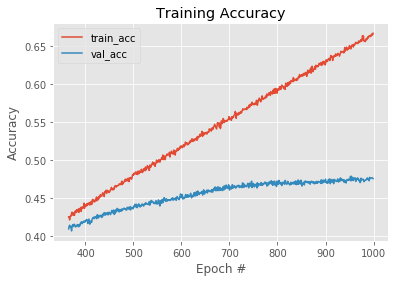

In [12]:
plt.style.use("ggplot")
plt.figure()
N = 635
plt.plot(np.arange(365, N+365), H.history["acc"], label="train_acc")
plt.plot(np.arange(365, N+365), H.history["val_acc"], label="val_acc")
plt.title("Training Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend(loc="upper left")
plt.savefig('feature_network_con.png')
plt.show()